<a href="https://colab.research.google.com/github/meraldin/pacmann-datascience-bootcamp/blob/main/03_pandas_wrangling/Data_Viz_%26_Wrangling_Mentoring_Week_8_Shafa_A_Meraldin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 7 - Visualization & Wrangling
---

Mentoring Session - Job Preparation Program - Pacmann AI

In [ ]:
# Please load this library
import numpy as np
import pandas as pd
from datetime import date,datetime

import seaborn as sns
import matplotlib.pyplot as plt

# Task Descriptions
---

- You are given a dataset of Online Store Retail Orders .
- The dataset contains 2 tables: `orders` and `product supplier`. You can join the tables on `Product ID`
- Your task is answer business questions below.
- But the data is not clean. Please **clean the data** by :
  1. Removing the unconsistency in `Customer Status`
  2. Dropping data with missing value (if any)
  3. Drop duplicates data (if any)

- Then, please **answer these business questions and give recommendations (you can also give some insights if you find something interesting)**:
  1. Which product has the highest profit percentage? The profit percentage can be calculated as:
  $$
  \text{Profit Percentage} = \cfrac
  {(\text{Unit Price - Cost Price per Unit})}
  {\text{Cost Price per Unit}} \cdot 100\%
  $$
  
  e.g. `unit price = 2.500`, `cost per unit price = 2.000`, <br>then `profit percentage = ((2.500 - 2.000)/2.000) * 100% = 500/2.000 * 100% = 25%`

  2. How much profit obtained month over month of every year?
  3. Does the lower the cost, the higher the profit? Does the cheaper the price the more people buy?
  4. Show the top 3 of the most favorite product in the latest year
  5. Find the tendency and the longest of order-to-delivery length for every month in the latest year (please use a proper measure of central tendency). Order-to-delivery length is defined as how much days was taken to deliver from order date of customer.
  6. The owner of store want to give discount promo. But, the promo is only for the active loyal customer. Help the owner find the unique `customer ID` of loyal customers and show the proportion of their status. Definition of active loyal customer is the customer who order more than 3 times and order in 3 latest months.
- **Hint**: data of customer status may be updated and different for every single order. You can use the maximum status level of the customer for question 6 (1: Silver, 2: Gold, 3: Platinum).
- **Note**: the month or year of order is defined from `Date Order`.

**Dataset**
- Please download the dataset in [here](https://drive.google.com/drive/folders/13QqqYUj8P06dXOUrtiea7K4MDendVNU5?usp=sharing)
- The actual data source is [here](https://www.kaggle.com/datasets/gabrielsantello/wholesale-and-retail-orders-dataset)

# Expected Output

The output should be:

**Question 1**
<center>
<img src="https://drive.google.com/uc?id=1QIJ3wZec4pcpnvumvcWSeErAMOp00PxZ">
</center>

```
Insert your interpretation of visualization
```
<br>


**Question 2**
<center>
<img src="https://drive.google.com/uc?id=1Qoa15HEA04W5KKJ5KcrlhIJ0J8kHs8g5">
</center>

```
Insert your interpretation of visualization
```
<br>


**Question 3**
<center>
<img src="https://drive.google.com/uc?id=1Q0HiVZlbOcAV5opDUkGVEZpKizoHzFme">
</center>

```
Insert your interpretation of visualization
```
<br>



**Question 4**

<center>
<img src="https://drive.google.com/uc?id=1AIWF6xRibdRZeProyHPeHN9sgNjOzGgz">
</center>

```
Insert your interpretation of visualization
```
<br>



**Question 5**

The order-to-delivery length of every month in the latest year:
<center>
<img src="https://drive.google.com/uc?id=1mIS80ZqqhV52VfMZzc64heWUljFoI5yb">
</center>

```
Insert your insights
```

<br>

**Question 6**
```
Total active loyal customers: 103
```

Customer ID of active loyal customer:
<center>
<img src="https://drive.google.com/uc?id=1iB9NUV7xIB_LIO7Y9POnE6GbDFmcaVw0">
</center>
<br>

Proportion of active loyal customer status:
<center>
<img src="https://drive.google.com/uc?id=1VmF25ko4werBb4dZAI1w_VTdgRQcczLs">
</center>

```
Insert your interpretation of visualization
```

# Answer
---


- Provide the code for getting the expected output

In [ ]:
# Write your code in here
# Provide your code with sufficient comment on the wrangling processes

#import libary pandas
import pandas as pd

#import dataset dari google drive
from google.colab import drive
drive.mount('/content/drive')
orders = pd.read_csv('/content/drive/MyDrive/PACMANN/PANDAS_DATA_WRANGLING/orders.csv')
product_supplier = pd.read_csv('/content/drive/MyDrive/PACMANN/PANDAS_DATA_WRANGLING/product_supplier.csv')

#gabungkan kedua dataset menjadi 1 dataframe
df_store = pd.merge(orders, product_supplier, on="Product ID", how="inner")


#Data Cleaning
#1. Removing the unconsistency in Customer Status

df_store["Customer Status"].unique()
df_store["Customer Status"].value_counts()

map_inconsistent = {
     "SILVER" : "Silver",
     "GOLD" : "Gold",
     "PLATINUM" : "Platinum",
}

df_store["Customer Status"].replace(map_inconsistent)
df_store["Customer Status"] = df_store["Customer Status"].replace(map_inconsistent)

#2. Dropping data with missing value (if any)
df_store.isna()
df_store.isna().sum()
df_store.isna().sum() / len(df_store) * 100
#karena tidak ada missing value maka tidak perlu drop/handle apapun

#3. Drop duplicates data (if any)
#cek dari semua kolom
df_store.duplicated(keep=False)
df_store[df_store.duplicated(keep=False)]

#cek berdasarkan kolom Order ID : tidak ada duplikat
df_store.groupby(["Order ID"]).agg({"Product ID": "count"}).sort_values("Product ID", ascending=False)
df_store[df_store.duplicated(subset="Order ID")]

#cek berdasarkan Supplier ID : 1 supplier untuk banyak produk dan order
df_store.groupby(["Supplier ID"]).agg({"Product ID": "count"}).sort_values("Product ID", ascending=False)
df_store[df_store.duplicated(subset="Supplier ID")]
df_store.groupby(["Supplier ID"]).agg({"Order ID": "count"}).sort_values("Order ID", ascending=False)
df_store[df_store.duplicated(subset="Supplier ID")]

#karena tidak ada data duplikat maka tidak perlu drop/handle apapun

#tampilkan cleaned dataframe
df_store

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Customer ID,Customer Status,Date Order was placed,Delivery Date,Order ID,Product ID,Quantity Ordered,Total Retail Price for This Order,Cost Price Per Unit,Product Line,Product Category,Product Group,Product Name,Supplier Country,Supplier Name,Supplier ID
0,579,Silver,01-Jan-17,07-Jan-17,123002578,220101400106,2,92.6,20.70,Clothes & Shoes,Clothes,Tracker Clothes,Casual V-Neck Men's Sweatshirt,US,3Top Sports,2963
1,7574,Silver,01-Jan-17,05-Jan-17,123004074,210201000009,1,21.7,9.95,Children,Children Sports,Tracker Kid's Clothes,Children's Tee,US,3Top Sports,2963
2,28861,Gold,01-Jan-17,04-Jan-17,123000871,230100500068,1,1.7,0.80,Outdoors,Outdoors,Outdoor Gear,Plate Picnic Deep,GB,Prime Sports Ltd,316
3,43796,Gold,01-Jan-17,06-Jan-17,123002851,220100100633,1,47.9,24.05,Clothes & Shoes,Clothes,Eclipse Clothing,Woman's Woven Pants L,US,Eclipse Inc,1303
4,54673,Gold,01-Jan-17,04-Jan-17,123003607,220200200043,1,36.9,18.30,Clothes & Shoes,Shoes,Shoes,Soft Gel Court Men's Indoor Shoes,US,Pro Sportswear Inc,1747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185008,92467,Silver,31-Dec-21,31-Dec-21,124433239,240100200001,4,64.0,6.35,Sports,Assorted Sports Articles,Darts,Aim4it 16 Gram Softtip Pil,GB,Royal Darts Ltd,4514
185009,92866,Silver,31-Dec-21,31-Dec-21,124436561,230100500058,1,16.7,7.25,Outdoors,Outdoors,Outdoor Gear,Mattress with 5 channels 196x72,GB,Prime Sports Ltd,316
185010,92894,Silver,31-Dec-21,31-Dec-21,124434316,220200100035,5,313.0,31.40,Clothes & Shoes,Shoes,Eclipse Shoes,Big Guy Men's Air Deschutz Viii Shoes,US,Eclipse Inc,1303
185011,93239,Gold,31-Dec-21,02-Jan-22,124436170,220200200047,2,271.6,68.00,Clothes & Shoes,Shoes,Shoes,Soft Gt 2050 Women's Running Shoes,US,Pro Sportswear Inc,1747


In [ ]:
import matplotlib.pyplot as plt


# 1. Profit Percentage
Which product has the highest profit percentage? The profit percentage can be calculated as:
Profit Percentage= ((Unit Price - Cost Price per Unit) / Cost Price Per Unit) * 100%

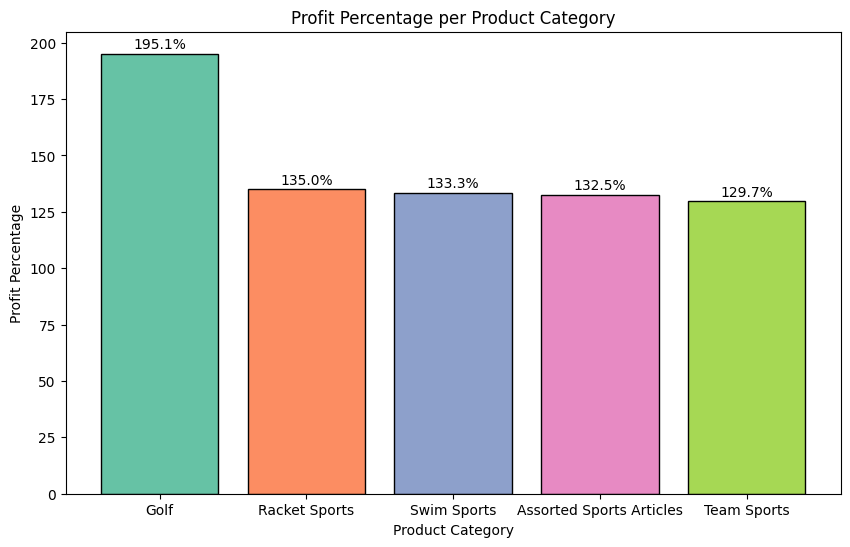

In [ ]:
 #Hitung dan add unit price ke df
df_store["Unit Price"] = df_store["Total Retail Price for This Order"] / df_store["Quantity Ordered"]

#Agregasi Unit Price & Cost Price Per Unit by Product Category
grouped = df_store.groupby(["Product Category"]).agg({"Unit Price": "median", "Cost Price Per Unit": "median"}).sort_values("Unit Price", ascending=False).reset_index()
grouped
#Hitung Profit Percentage by Product category
grouped["Profit Percentage"] = ((grouped["Unit Price"] - grouped["Cost Price Per Unit"]) / grouped["Cost Price Per Unit"]) * 100

# #viz all categories
# # Sort by Profit Percentage (optional for better visual ordering)
# grouped_sorted = grouped.sort_values("Profit Percentage", ascending=False)

# # Pick a colormap with enough distinct colors
# colors = plt.cm.tab20.colors[:len(grouped_sorted)]

# # Plot
# plt.figure(figsize=(12, 6))
# bars = plt.bar(grouped_sorted["Product Category"], grouped_sorted["Profit Percentage"], color=colors, edgecolor='black')

# # Add value labels
# for bar in bars:
#     height = bar.get_height()
#     plt.text(bar.get_x() + bar.get_width()/2., height + 1, f'{height:.1f}%', ha='center', va='bottom', fontsize=8)

# # Style
# plt.xlabel("Product Category")
# plt.ylabel("Profit Percentage")
# plt.title("Profit Percentage per Product Category")
# plt.show()

#viz top 5
# Sort by Profit Percentage & take Top 5
top5 = grouped.sort_values("Profit Percentage", ascending=False).head(5)

# Generate 5 distinct colors
colors = plt.cm.Set2.colors[:5]  # You can also try plt.cm.tab10, Set3, etc.

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(top5["Product Category"], top5["Profit Percentage"], color=colors, edgecolor='black')

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1, f'{height:.1f}%', ha='center', va='bottom')

# Style the chart
plt.xlabel("Product Category")
plt.ylabel("Profit Percentage")
plt.title("Profit Percentage per Product Category")
plt.show()

#tampilkan dataframe
# df_store



Interpretation for the Visualization

---


*   From 12 categories on dataframe, there are 5 top product categories with highest profit percentage which are : Golf, Racket sports, swim sports, assorted sports articles, and team sports
*   The "Golf" category exhibits a significantly higher profit percentage (195.1%) as top 1 compared to all other categories. This suggests that golf products are highly profitable.
*  The remaining categories ("Racket Sports," "Swim Sports, "Assorted Sports Articles," and "Team Sports") show relatively similar profit percentages, ranging from approximately 129.7% to 135.0%. While there are slight variations, they are considerably lower than the profit margin for golf products.

Business Recommendations


---



1.   Maximize Golf
      *   Increase Inventory
      *   Focus marketing efforts to leverage high profitability
      *   Explore premium options like expanding higher-margin golf products

2.   Improve other categories
      *   cost analysis for reducing expenses
      *   evaluate pricing strategy
      *   identify top product with high profitability or low potential product on each product categories to decide action step (adjust pricing, marketing, or discontinue)

#2. MoM (Month over Month) profit every year

<ipython-input-234-a876d1e91e5a>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_store["Order Date"] = pd.to_datetime(df_store["Date Order was placed"])


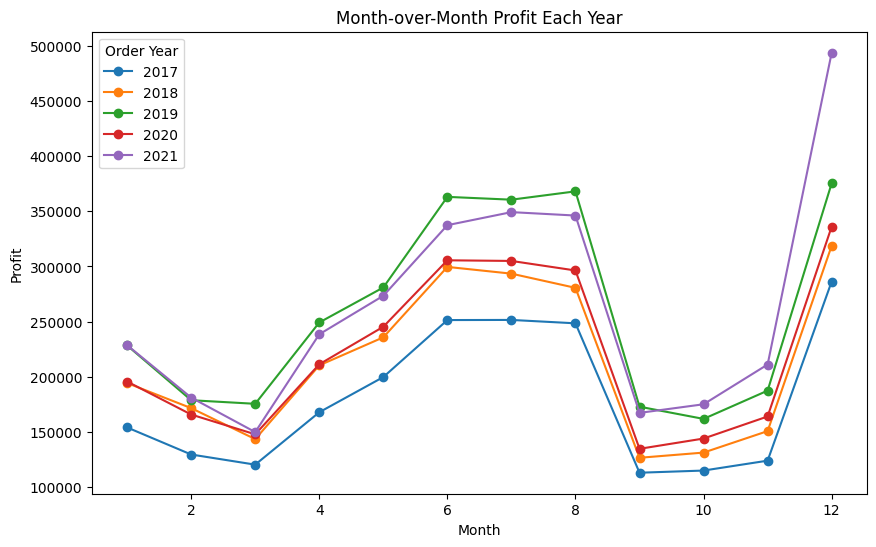

In [ ]:
#Hitung profit
df_store["Profit"] = (df_store["Unit Price"] - df_store["Cost Price Per Unit"]) * df_store["Quantity Ordered"]

#Add New Column Month and Year
df_store["Order Date"] = pd.to_datetime(df_store["Date Order was placed"])
df_store["Order Year"] = df_store["Order Date"].dt.strftime("%Y")
df_store["Order Month"] = df_store["Order Date"].dt.month

#Grouping by Month and Year
grouped_profit = df_store.groupby(["Order Year", "Order Month"]).agg({"Profit": "sum"}).reset_index()
grouped_profit

# Pivot to have each year as a column (for line plot)
pivot_profit = grouped_profit.pivot(index="Order Month", columns="Order Year", values="Profit")

#Viz
# Plot
plt.figure(figsize=(10, 6))

for year in pivot_profit.columns:
    plt.plot(pivot_profit.index, pivot_profit[year], marker='o', label=year)

# Styling
plt.title("Month-over-Month Profit Each Year")
plt.xlabel("Month")
plt.ylabel("Profit")
plt.legend(title="Order Year")
plt.show()

#tampilkan dataframe
# df_store

Interpretation for the Visualization

---


*   The line chart displays the month-over-month profit for each year from 2017 to 2021
*   Generally, profits tend to be lower in the earlier months of the year and peak towards the end of the year, particularly in November and December.
*   Dec 2021 showing the highest profit (2017-2021)
*   There are seasonal patterns : lower profit around mid of the year (roughly june to October) and peak profitability around the end of the year (november to december)

Business Recommendations


---

1.   Capitalize on Year-End Peaks Profit
      *   Maximizing inventory and staffing on these period
      *   Specific marketing in the year-end

2.   Evaluate mid-year lower profitability
      *   cause analysis for lower demand
      *   after knowing the causes, build strategies (targeted promotions, introduce seasonal products, etc)

#3. Cost Influence on Profit

Does the lower the cost, the higher the profit? Does the cheaper the price the more people buy?

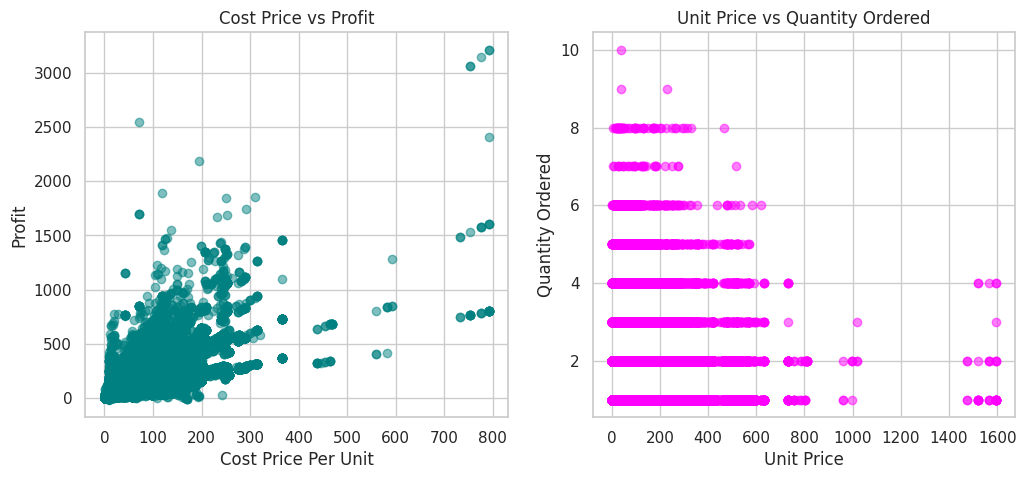

In [ ]:
#Scatter plot
plt.figure(figsize=(12, 5))

# 1. Scatter Plot: Cost Price Per Unit vs Profit
plt.subplot(1, 2, 1)
plt.scatter(df_store["Cost Price Per Unit"], df_store["Profit"], alpha=0.5, color='teal')
plt.title("Cost Price vs Profit")
plt.xlabel("Cost Price Per Unit")
plt.ylabel("Profit")

# 2. Scatter Plot: Unit Price vs Quantity Ordered
plt.subplot(1, 2, 2)
plt.scatter(df_store["Unit Price"], df_store["Quantity Ordered"], alpha=0.5, color='magenta')
plt.title("Unit Price vs Quantity Ordered")
plt.xlabel("Unit Price")
plt.ylabel("Quantity Ordered")

plt.show()

In [ ]:
#Correlation score
corr_cost_profit = df_store[["Cost Price Per Unit", "Profit"]].corr()
corr_price_qty = df_store[["Unit Price", "Quantity Ordered"]].corr()

print(corr_cost_profit)
print(corr_price_qty)

                     Cost Price Per Unit   Profit
Cost Price Per Unit              1.00000  0.73715
Profit                           0.73715  1.00000
                  Unit Price  Quantity Ordered
Unit Price          1.000000          0.003583
Quantity Ordered    0.003583          1.000000


Interpretation for the Visualization

---


Cost Price vs Profit Scatter Plot

*   Each point on this scatter plot represents a single transaction or product.
*   The x-axis shows the "Cost Price Per Unit.
*   The y-axis shows the "Profit" for that unit or transaction.
*   The plot shows there is cost influence on profit which is positive correlation, although not perfectly linear. Generally, as the cost price per unit increases, the potential for higher profit also increases
*   However, there are lots of dots on the left-lower side of the plot. This suggests that low cost doesn't guarantee high profit. Just because something is cheap to buy, doesn't mean it will automatically make a lot of profit.
*   There are also instances of higher cost prices leading to lower profits, indicating other factors (like pricing strategy or sales volume) play a significant role. It is not only cost that influences the profits.

Does the lower the cost, the higher the profit? Not necessarily directly. While lower costs can enable higher profit margins, the left chart shows that low cost doesn't automatically translate to high profit. Pricing strategy, sales volume, and other factors also significantly influence the final profit. You can have low-cost items with low profit if they are priced very competitively or sold in small volumes. Conversely, higher-cost items can yield higher profits if priced strategically and sold effectively.

---



Unit Price vs Quantity Ordered

*   Each point here represents a single transaction or product.
*   The x-axis shows the "Unit Price."
*   The y-axis shows the "Quantity Ordered."
*   There's a negative correlation, suggesting that as the unit price increases, the quantity ordered tends to decreases.
*   A large number of orders are concentrated at lower unit prices, with varying quantities ordered.
*   As the unit price goes higher, the quantity ordered generally becomes lower, with fewer instances of large quantities being purchased at high prices. However, there are still some sales at higher prices.

Does the cheaper the price the more people buy? Generally, yes, the right chart suggests this. There's a clear trend of higher quantities ordered at lower unit prices. However, it's not an absolute rule. There are still sales occurring at higher prices, indicating that factors beyond just price (like brand loyalty, perceived value, or specific needs) also drive purchasing decisions.


Business Recommendations

---

1.   Understand the relationship between cost, perceived value, and optimal pricing to maximize profit. Analyze the cluster of low-cost items with varying profits
2.   Strategic pricing for volume (promo pricing & tiered pricing to boost sales volume for price-sensitive items). Higher tendency for higher purchase volume at lower prices for certain products can be the solutions.
3.   Do customer analysis and make segmentation particularly for customers who value quality over quantity because not all customers is price-sensitive.

#4. Top 3 Most Favorite Products for The Latest Year

Show the top 3 of the most favorite products in the latest year


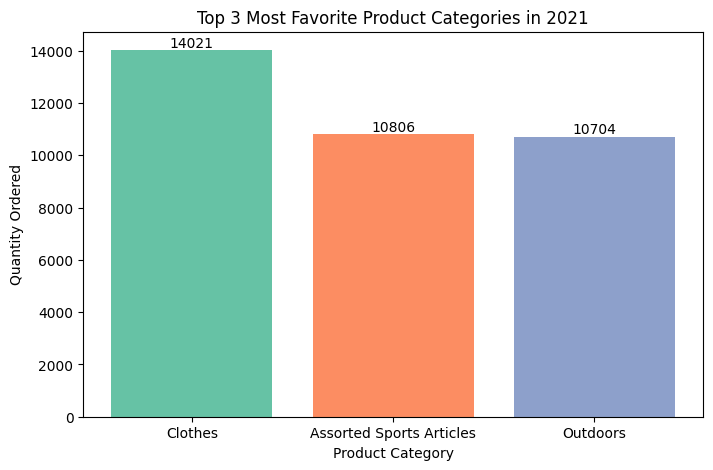

In [ ]:
#Latest year
latest_year = df_store["Order Year"].max()
df_store_latest = df_store[df_store["Order Year"] == latest_year]

#Groupby Product Category
group_top3 = (df_store_latest.groupby("Product Category") ["Quantity Ordered"]
            .sum()
            .sort_values(ascending=False)
            .head(3)
            .reset_index()
)
#Viz
colors = plt.cm.Set2.colors
plt.figure(figsize=(8, 5))
bars = plt.bar(group_top3["Product Category"], group_top3["Quantity Ordered"], color=colors)

plt.title(f"Top 3 Most Favorite Product Categories in {latest_year}")
plt.xlabel("Product Category")
plt.ylabel("Quantity Ordered")

# Tambah label di atas bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{int(height)}', ha='center', va='bottom')
plt.show()

Interpretation for the Visualization

---

*   The three bars represent the top three most popular product categories based on the number of orders whice are consist of clothes, assorted sport articles, and outdoors
*   x-axis represents quantity ordered
*   y-axis represent product categories
*   The "Clothes" bar is the 1st most favorite with 14021 orders, followed by "Assorted Sports Articles" with 10806 orders, and then "Outdoors" with 10704 orders.

Business Recommendations


---

1.   Capitalize on Clothes
      *   Maximizing inventory for clothes category to avoid stockouts
      *   Analyze the specific types of clothes that were most popular within this category in 2021 to anticipate future demand.
      *   Continue or even increase marketing efforts towards your clothing line.

2.   Increase popularity of assorted sports articles & outdoors
      *   cross-promotions (e.g. bundling related items or offer discount) when customers purchase both categories
      *   look at trends and customer feedback for expanding product range
      *   create content (blog posts, social media) related to assorted sports articles and outdoor activities, featuring both products categories

3.    Analyze future demand compared to 2021's trends
      *   get sales data for next years and see if the patterns continued
      *   Determine if new product categories have risen in popularity in recent years.

#5. Monthly Order to Delivery Length in Latest Year
The order-to-delivery length of every month in the latest year:

In [ ]:
#Convert Delivery Date
df_store["Delivery Date"] = pd.to_datetime(df_store["Delivery Date"])

#Calculate Delivery Length
df_store["Delivery Length"] = (df_store["Delivery Date"] - df_store["Order Date"]).dt.days

#Extract Year and Month Delivery
df_store["Delivery Year"] = df_store["Order Date"].dt.year
df_store["Delivery Month"] = df_store["Order Date"].dt.month

#Latest year Dataframe
latest_year = df_store["Order Year"].max()
df_store_latest = df_store[df_store["Order Year"] == latest_year]

#Groupby OTDL per Month
group_otdl = (df_store_latest.groupby("Order Month")["Delivery Length"]
                .agg(["median", "max"])
                .reset_index()
                .rename(columns={
                    "median": "The Order to Delivery Length",
                    "max": "The Longest Order to Delivery Length"
                }))

group_otdl

<ipython-input-237-368a3c4ee92f>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_store["Delivery Date"] = pd.to_datetime(df_store["Delivery Date"])


,Order Month,The Order to Delivery Length,The Longest Order to Delivery Length
0,1,0.0,20
1,2,0.0,20
2,3,0.0,23
3,4,0.0,19
4,5,0.0,18
5,6,0.0,16
6,7,0.0,21
7,8,0.0,17
8,9,0.0,21
9,10,0.0,22


Interpretation for the Visualization

---

*   This table provides a summary of the order-to-delivery length for each month of the latest year (2021)
*   The first column clearly indicates the month of the year, numbered from 1 (January) to 12 (December).
*  The OTDL is counted in days
*  The second column, "The Order to Delivery Length" (Median OTDL), shows the middle value of the delivery time for all orders placed in that specific month. A median of 0.0 days across all months indicates that for at least half of the orders placed each month, the delivery occurred on the same day they were placed. This shows a very efficient and fast delivery system for a significant portion of   orders throughout the entire year.
*    The third column, "The Longest Order to Delivery Length", shows the maximum number of days it took for any single order to be delivered within that month. This highlights the extreme end of delivery times and potential bottlenecks. The longest delivery times are in November (24 days) and December (25 days), while the shortest longest delivery times are in May (18 days) and June (16 days). Other months range between 19 and 23 days for the longest delivery.

Business Recommendations


---

1. Highlight Same-day Delivery Capability. Promote ability to offer same-day delivery for competitive advantage (with TnC applied)

2. Evaluate longest delivery bottlenecks specially Dec & Nov. While the  median delivery time is excellent, the longest delivery times, particularly in November and December, indicate potential bottlenecks or issues handling peak demand. Focus on understanding why some deliveries take so long during these months. This could involve analyzing order processing times during high volume, warehouse and fulfillment efficiency, shipping carrier performance during peak seasons.

3. Identify short delivery factors and ensure there factors are maintained and expanded (e.g efficient order processing, local warehouse, optimized delivery routes, etc)

4. Monitor and evaluate the range of delivery time. Pay attention to the difference between the median and longest
 delivery times each month. A large gap might indicate inconsistencies in  delivery process. Aim to reduce this variability to provide a more predictable delivery experience for all customers.

5. Manage customer expectations regarding potential longer delivery times, especially for certain products, locations, or during peak periods.

#6. Total and Proportion Status of Active Customers

Total active loyal customers and Proportion of active loyal customer status.

In [ ]:
#Latest year
latest_year = df_store["Order Year"].max()
df_store_latest = df_store[df_store["Order Year"] == latest_year]

#Latest 3 months
latest_3_months = sorted(df_store_latest["Order Month"].dropna().unique())[-3:]

#Filter data hanya 3 bulan terakhir, lalu buat salinannya agar aman
df_store_latest_3months = df_store_latest[df_store_latest["Order Month"].isin(latest_3_months)].copy()

#Hitung jumlah order per customer di 3 bulan terakhir
order_counts = df_store_latest_3months.groupby('Customer ID').size().reset_index(name='order_count')

#Ambil hanya customer yang order lebih dari 3 kali
loyal_customers = order_counts[order_counts['order_count'] > 3].copy()

#Ubah status ke angka
status_mapping = {
    'Silver': 1,
    'Gold': 2,
    'Platinum': 3
}
df_store_latest_3months.loc[:, 'Customer Status Num'] = df_store_latest_3months['Customer Status'].map(status_mapping)

#Ambil status tertinggi tiap customer
customer_status = df_store_latest_3months.groupby('Customer ID')['Customer Status Num'].max().reset_index()

#Gabungkan ke data loyal_customers
loyal_customers = loyal_customers.merge(customer_status, on='Customer ID', how='left')

#Balikkan status angka ke teks
reverse_mapping = {
    1: 'Silver',
    2: 'Gold',
    3: 'Platinum'
}
loyal_customers.loc[:, 'Customer Status'] = loyal_customers['Customer Status Num'].map(reverse_mapping)

# Hitung jumlah customer per status
status_counts = loyal_customers['Customer Status'].value_counts()

# Hitung proporsi per status (dalam persen)
status_proportion = loyal_customers['Customer Status'].value_counts(normalize=True) * 100
status_proportion = status_proportion.round(2)

# Tampilkan hasil
print(status_counts)
print("--------------")
print(status_proportion)

Customer Status
Gold        91
Platinum    10
Silver       2
Name: count, dtype: int64
--------------
Customer Status
Gold        88.35
Platinum     9.71
Silver       1.94
Name: proportion, dtype: float64


In [ ]:
#Create a new DataFrame with only Customer ID column
loyal_customer_ids_df = loyal_customers[['Customer ID']].reset_index(drop=True)

# Display the DataFrame
print(loyal_customer_ids_df)

     Customer ID
0            863
1            870
2           1244
3           1263
4           1342
..           ...
98         88563
99         91511
100        92311
101        92969
102        93797

[103 rows x 1 columns]


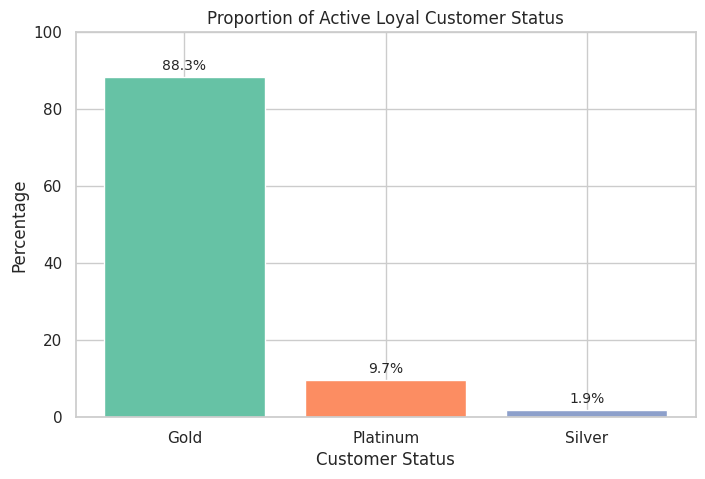

In [ ]:
import matplotlib.pyplot as plt

# Siapkan data
status_counts = loyal_customers['Customer Status'].value_counts(normalize=True) * 100
status_df = status_counts.reset_index()
status_df.columns = ['customer_status_name', 'percentage']
status_df = status_df.sort_values(by='percentage', ascending=False)

# Gunakan colormap Set2
colors = plt.cm.Set2.colors

# Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(status_df['customer_status_name'], status_df['percentage'], color=colors[:len(status_df)])

# Tambah label di atas bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{height:.1f}%', ha='center', va='bottom', fontsize=10)

# Tambahkan detail
plt.title('Proportion of Active Loyal Customer Status')
plt.xlabel('Customer Status')
plt.ylabel('Percentage')
plt.ylim(0, 100)

plt.show()


Interpretation for the Visualization

---

Based on the image and table, the distribution of active loyal customers across different status levels is as follows:
*  Gold: 88.35% (91 customers)
*  Platinum: 9.71% (10 customers)
*  Silver: 1.94% (2 customers)

The provided table also lists 103 unique Customer IDs of active loyal customers.

Business Recommendations


---

1. The owner of store want to give discount promo. But, the promo is only for the active loyal customer. So, the store owner's idea of offering a discount promo to active loyal customers is a good strategy to retain these valuable customers.

2. Given the status distribution, the store owner can consider personalizing offers based on customer status.
    *   Gold Customers: Since they are the majority, the store can offer exclusive discounts, early access to sales, or loyalty points to maintain their engagement.
    *   Platinum Customers: These are the most valuable customers. The store owner can offer premium services, personalized gifts, or invitations to exclusive events.
    *   Silver Customers: Focus on strategies to upgrade them to higher tiers. This could involve offering bonus points for spending a certain amount or introducing them to the benefits of higher tiers.

3. In all promo communications, emphasize the benefits of being a loyal customer and how the current promo is an exclusive perk for each customer status.

4. After implementing the promo, track the impact on sales, customer retention, and status upgrades. This data will help forecast future loyalty programs.
